In [182]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [183]:
data_train = pd.read_csv("/content/drive/MyDrive/train.csv")
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [184]:
#survived  = target

In [185]:
data_train.replace(["female" , "male"] , [0 , 1] , inplace=True)

In [186]:
data_train.fillna(0 , inplace=True)
data_train = data_train.drop(["Name" , "Ticket" , "Cabin" , "Embarked"], axis=1)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


<Axes: >

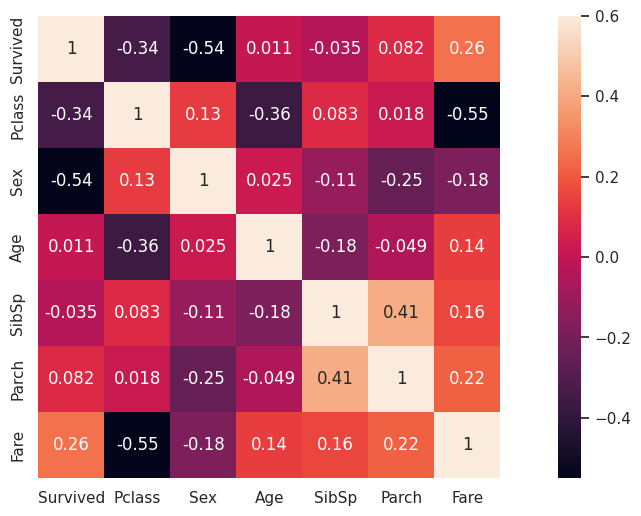

In [187]:
import seaborn as sns

plt.figure(figsize=(15,6))
sns.heatmap(data_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [188]:
X_train = np.array(data_train[["Pclass" , "Sex" , "Age" , "SibSp" , "Parch" , "Fare"]])
Y_train = np.array(data_train[["Survived"]])

In [189]:

# x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

# model

In [190]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6  , activation="sigmoid"), #input layer
    tf.keras.layers.Dense(20  , activation="relu"),
    tf.keras.layers.Dense(8  , activation="sigmoid"),
    tf.keras.layers.Dense(2  , activation="softmax"),
])

In [191]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001) , loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=["accuracy"])

In [192]:
output = model.fit(X_train  , Y_train , epochs= 150)

Epoch 1/150
28/28 [==============================] - 1s 3ms/step - loss: 0.8385 - accuracy: 0.3838
Epoch 2/150
28/28 [==============================] - 0s 3ms/step - loss: 0.7204 - accuracy: 0.4220
Epoch 3/150
28/28 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.6072
Epoch 4/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6162
Epoch 5/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.6162
Epoch 6/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.6162
Epoch 7/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6162
Epoch 8/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6162
Epoch 9/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6162
Epoch 10/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.6162
Epoch 11/

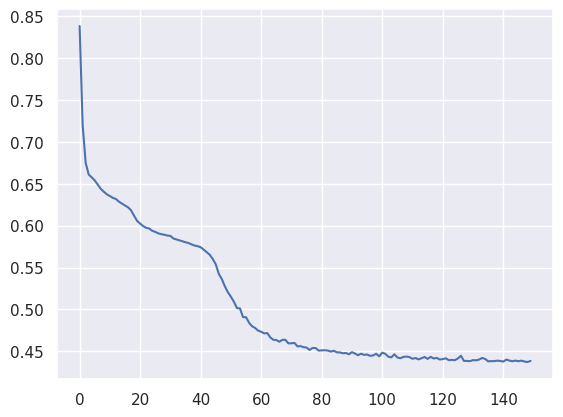

In [193]:
plt.plot(output.history["loss"])
plt.show()

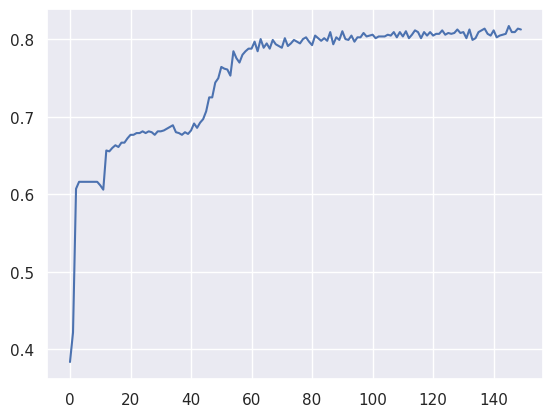

In [194]:
plt.plot(output.history["accuracy"])
plt.show()

# TEST PHASE

In [195]:
data_test = pd.read_csv("/content/drive/MyDrive/test.csv")

In [196]:
target = pd.read_csv("/content/drive/MyDrive/gender_submission.csv")
Y_test = target[["Survived"]]

In [197]:
np.array(Y_test)

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [198]:
data_test.replace(["female" , "male"] , [0 , 1] , inplace=True)
data_test.fillna(0 , inplace=True)
data_test = data_test.drop(["Name" , "Ticket" , "Cabin" , "Embarked"], axis=1)

X_test = np.array(data_test[["Pclass" , "Sex" , "Age" , "SibSp" , "Parch" , "Fare"]])



In [199]:
loss , acc = model.evaluate(X_test , Y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.9498


In [200]:
X_train.shape, Y_train.shape, X_test.shape , Y_test.shape

((891, 6), (891, 1), (418, 6), (418, 1))

# model predict

In [201]:
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1,0.0,0,0,8.0500
414,1306,1,0,39.0,0,0,108.9000
415,1307,3,1,38.5,0,0,7.2500
416,1308,3,1,0.0,0,0,8.0500


In [204]:
Jack_Dawson = [3, 1, 19, 0, 0, 5.0000]
Rose_DeWitt_Bukater = [1, 0, 17, 1, 2, 100.0000]

pred_jack = model.predict([Jack_Dawson])
pred_rose = model.predict([Rose_DeWitt_Bukater])

print("Jack Surviving Rate:", pred_jack[0][1])
print("Rose Surviving Rate:", pred_rose[0][1])

1/1 [==============================] - 0s 63ms/step
Jack Surviving Rate: 0.094626665
Rose Surviving Rate: 0.87550116
